## 1. Collecting the data

### load train, test dataset using Pandas

In [1]:
import pandas as pd
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 2. Exploratory data analysis

Printing first 5 rows of the train dataset.

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary


- Survival : 0 = No, 1 = Yes
- pclass :Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sex : Sex	
- Age : Age in years	
- sibsp : # of siblings / spouses aboard the Titanic	
- parch : # of parents / children aboard the Titanic	
- ticket : Ticket number	
- fare : Passenger fare	
- cabin : Cabin number	
- embarked : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

- age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp : The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch : The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

#### Total rows and columns
We can see that there are 891 rows and 12 columns in our training dataset.

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()   # 결측치 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### import python lib for visualization

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # seborn을 디폴트로 설정하기

### Bar Chart for Categorical Features
 - Pclass
 - Sex
 - SibSp (# of siblings and spouse)
 - Parch (# of parents and children)
 - Embarked
 - Cabin

In [11]:
def bar_chart(feature) :
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

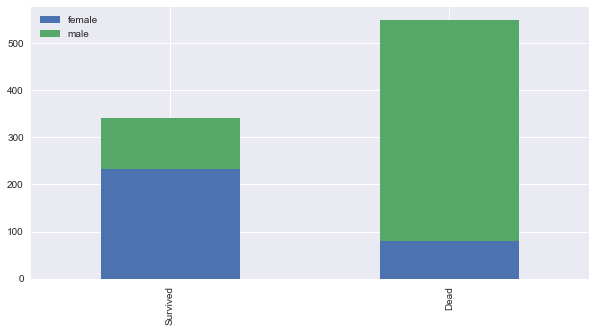

In [12]:
bar_chart('Sex')

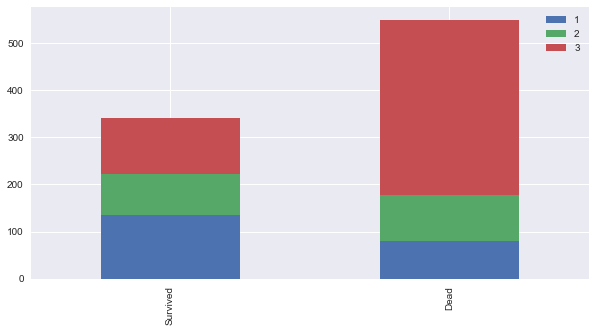

In [13]:
bar_chart('Pclass')

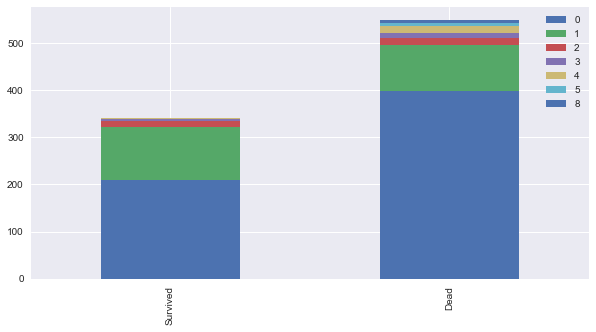

In [14]:
bar_chart('SibSp')

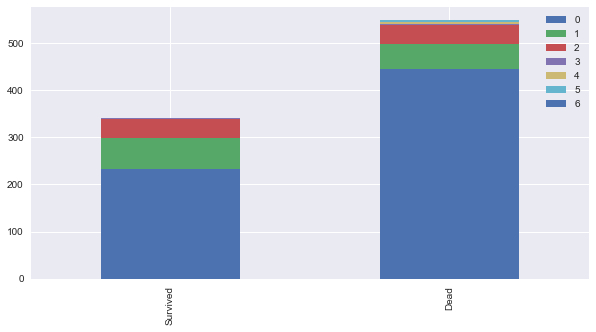

In [15]:
bar_chart('Parch')

## 3. Feature engineering
 피쳐 엔지니어링은 분석 이전에 필수적으로 거쳐야 할 과정으로, 이 과정에서 데이터를 제대로 가공하지 않으면 어떤 알고리즘을 사용하더라도 제대로 된 결과를 얻기 힘들다.

 피쳐는 데이터의 Column, Attribute를 의미하며며, 각 피쳐들을 벡터화하여 전처리를 실시한다.

###  3.1 How Titanic sank?
후미에 위차한 3등석부터 침몰이 시작되었으므로, Pclass와 객실의 위치 등은 상당히 좋은 변수가 될 것으로 예상된다.

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 Name

In [17]:
train_test_data = [train, test]  # 두 데이터셋을 하나로 병합
for dataset in train_test_data :
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False) # 이름에서 Mr, Mrs 등과 같은 정보만 추출

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Sir           1
Jonkheer      1
Lady          1
Ms            1
Mme           1
Countess      1
Don           1
Name: Title, dtype: int64

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [20]:
title_mapping = {'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Dr' : 3,
                'Rev' : 3, 'Col' : 3, 'Major' : 3, 'Mlle' : 3, 'Countess' : 3, 
                'Ms' : 3, 'Lady' : 3, 'Jonkheer' : 3, 'Don' : 3, 'Dona' : 3, 'Mme' : 3, 'Capt' : 3, 'Sir' : 3}
for dataset in train_test_data :
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [21]:
 train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


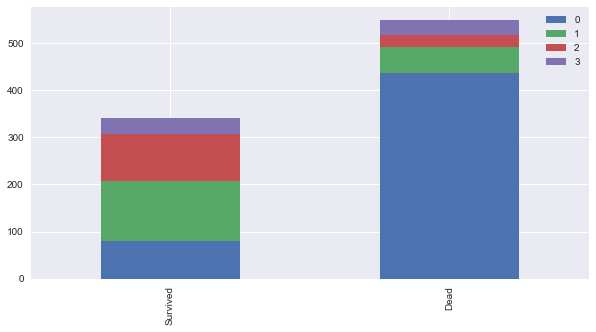

In [22]:
bar_chart('Title')

In [23]:
# title 데이터를 얻었기 때문에 name column은 삭제
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

### 3.3 Sex
male : 0
female : 1

In [24]:
sex_mapping = {'male' : 0, 'female' : 1}
for dataset in train_test_data :
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

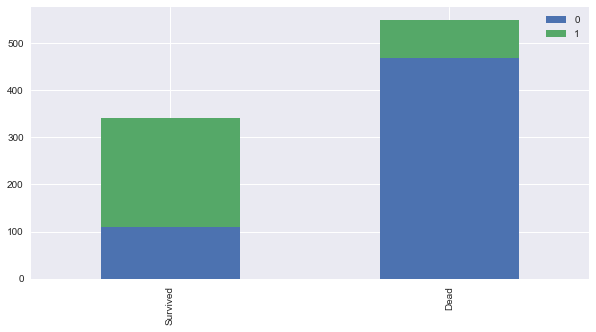

In [25]:
bar_chart('Sex')

### 3.4 Age

#### 3.4.1 Some age is missing
각 Title의 중위값을 나이 결측값으로 채워넣어서 처리

In [26]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [27]:
# 중위수를 통해 결측값 채워넣기
train["Age"].fillna(train.groupby("Title")["Age"].transform('median'), inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform('median'), inplace = True)

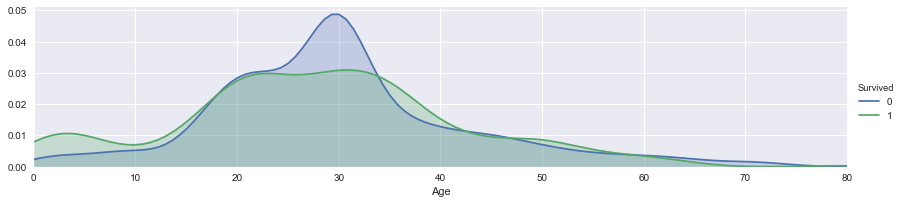

In [28]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True) # 밀도함수 그리기
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.show()

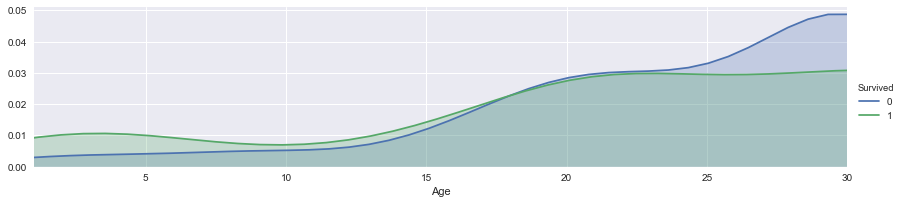

In [29]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True) # 밀도함수 그리기
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(1, 30) # x레이블 범위 제한하기
plt.show()

### 3.4.2 Binning
연속형 데이터를 범주화(순서형 변수로)

feature vector map :
 - child : 0
 - young : 1
 - adult : 2
 - mid-age : 3
 - senior : 4

In [30]:
for dataset in train_test_data :
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16)  & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26)  & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36)  & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


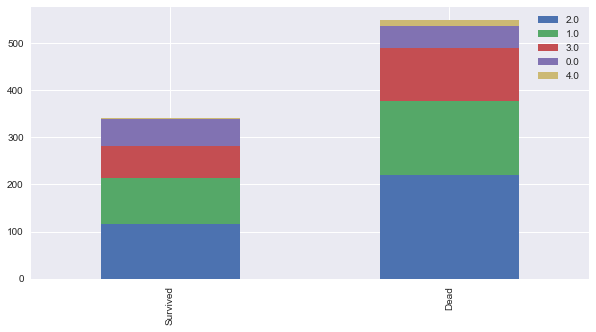

In [32]:
bar_chart('Age')

### 3.5 Embarked
#### 3.5.1 filling missing values

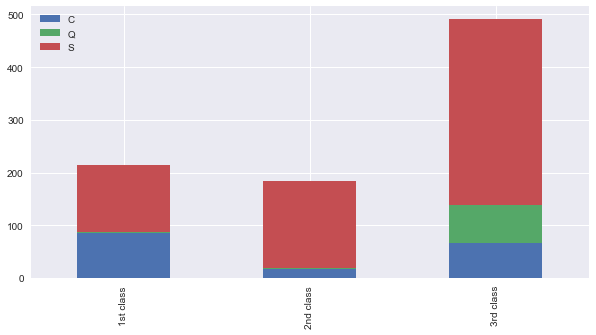

In [33]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

1등석의 절반 이상이 S에서 승선  
2등석의 절반 이상이 S에서 승선  
3등석의 절반 이상이 S에서 승선  
따라서 Embarked 변수가 결측일 때에는 S라고 봐도 무방

In [34]:
for dataset in train_test_data :
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [36]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}
for dataset in train_test_data : 
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 3.5 Fare
티켓 가격 결측치 채우기

In [37]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

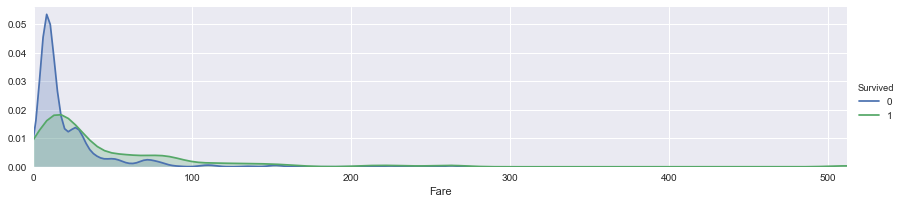

In [38]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()

plt.show()

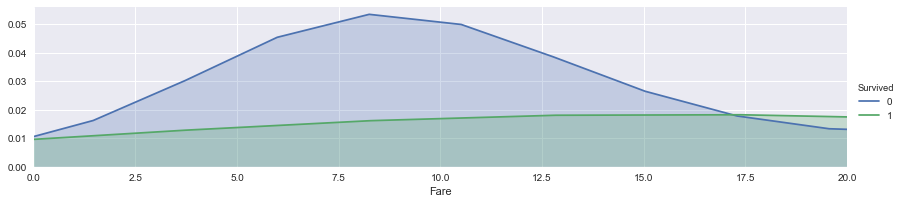

In [39]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 20)
plt.show()

In [40]:
for dataset in train_test_data :
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17)  & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30)  & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 3.7 Cabin

In [42]:
# 객실의 호수 파악하기
train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
D                  3
C22 C26            3
F2                 3
E101               3
F33                3
D36                2
C2                 2
C123               2
E121               2
E8                 2
B51 B53 B55        2
F4                 2
E25                2
B22                2
C68                2
C52                2
E33                2
C125               2
B35                2
B20                2
E67                2
B77                2
C124               2
C78                2
B5                 2
B57 B59 B63 B66    2
D26                2
                  ..
D45                1
A24                1
B4                 1
B79                1
D10 D12            1
C87                1
D9                 1
C32                1
D37                1
E49                1
C86                1
D30                1
T                  1
E10                1
E40                1
B37                1
E17          

In [43]:
for dataset in train_test_data :
    dataset['Cabin'] = dataset['Cabin'].str[:1]

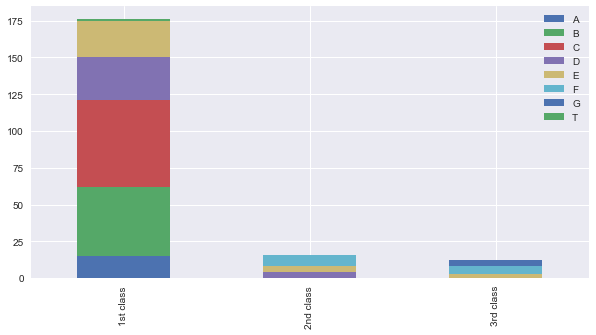

In [44]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

1등급은 A, B, C, D, E로 시작하는 객실을 사용하며, 2등급과 3등급에는 해당 객실이 없다.

In [45]:
cabin_mapping = {'A' : 0, 'B' : 0.4, 'C' : 0.8, 'D' : 1.2, 'E' : 1.6, 'F' : 2, 'G' : 2.4, 'T' : 2.8}
# Feature scaling을 위하여 소수점 단위로 나눔
for dataset in train_test_data :
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [46]:
# 중위수로 결측치 채워넣기
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

### 3.8 FamilySize

In [47]:
# 가족 단위로 가족 구성원 수를 계산
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

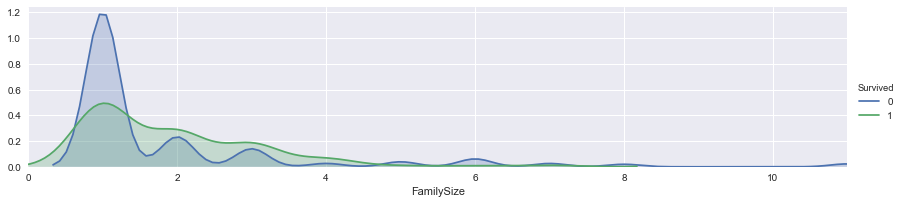

In [48]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True) # 밀도함수 그리기
facet.set(xlim = (0, train['FamilySize'].max()))
facet.add_legend()
plt.show()

In [49]:
family_mapping = {1 : 0, 2 : 0.4, 3 : 0.8, 4 : 1.2, 5 : 1.6, 6 : 2,
                 7 : 2.4, 8 : 2.8, 9 : 3.2, 10 : 3.6, 11 : 4}
for dataset in train_test_data :
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [51]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId'], axis = 1)

In [52]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [53]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## 4. Modelling

In [54]:
# 분류 모듈 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


### 4.1 Cross validation(10-fold)

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

###  4.1.1 kNN

In [57]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[ 0.82222222  0.76404494  0.80898876  0.83146067  0.87640449  0.82022472
  0.85393258  0.79775281  0.84269663  0.84269663]


In [58]:
# kNN Score
round(np.mean(score) * 100, 2)

82.599999999999994

### 4.1.2 Decision Tree

In [59]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[ 0.76666667  0.83146067  0.7752809   0.7752809   0.88764045  0.75280899
  0.83146067  0.82022472  0.74157303  0.78651685]


In [60]:
# Decision Tree score
round(np.mean(score) * 100, 2)

79.689999999999998

### 4.1.3 Random Forest

In [62]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[ 0.78888889  0.83146067  0.82022472  0.80898876  0.87640449  0.80898876
  0.82022472  0.83146067  0.75280899  0.78651685]


In [63]:
# Random Forest score
round(np.mean(score) * 100, 2)

81.260000000000005

### 4.1.4 Navie Bayes

In [66]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[ 0.85555556  0.73033708  0.75280899  0.75280899  0.70786517  0.80898876
  0.76404494  0.80898876  0.86516854  0.83146067]


In [67]:
# Naive Bayes score
round(np.mean(score) * 100, 2)

78.780000000000001

### 4.1.5 SVM

In [70]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[ 0.83333333  0.80898876  0.83146067  0.82022472  0.84269663  0.82022472
  0.84269663  0.85393258  0.83146067  0.86516854]


In [71]:
# Naive Bayes score
round(np.mean(score) * 100, 2)

83.5

## 5. Testing

In [73]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis = 1).copy()
prediction = clf.predict(test_data)

In [75]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Survived' : prediction
})

submission.to_csv('submission.csv', index = False)

In [76]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
